**Jeff Rouzel A. Bat-og**<br>
2021-03145<br>
https://github.com/jeffrouzel/CMSC197-Machine-Learning.git

## Importing the Libraries

In [1]:
# For numerical operations, data manipulation and analysis
import numpy as np              
import pandas as pd

# Preprocessing
import email
import re

# For plotting the data             
import matplotlib.pyplot as plt 

from collections import Counter

## Explore the Dataset (Preprocessing)

In [2]:
# Dataframe for Emails
emaildf = pd.DataFrame(columns = ['location', 'email_content', 'classification'])
classification = []
location = []

# read labels file, split the label and file location, then append lists as part of the dataframe
with open(r'labels') as f:
    for line in f:
        label, locate = line.split()
        if label == 'ham':
            label = 0
        elif label == 'spam':
            label = 1
        classification.append(label)
        location.append(locate.replace('../data/', ''))

emaildf['classification'] = classification
emaildf['location'] = location
emaildf

,location,email_content,classification
0,000/000,NaN,0
1,000/001,NaN,1
2,000/002,NaN,1
3,000/003,NaN,0
4,000/004,NaN,1
...,...,...,...
37817,126/017,NaN,1
37818,126/018,NaN,1
37819,126/019,NaN,1
37820,126/020,NaN,1


## Getting and Cleaning the Email

In [3]:
# Reading stopwords.txt file
with open('stop_words.txt', 'r') as f:
    stopwords = f.readlines()

stopwords = [word[:-1] for word in stopwords]

#stopwords

In [4]:
def getEmail(content):
    msg = email.message_from_file(content)
    
    if msg.is_multipart():
        for part in msg.walk():
            if part.get_content_type() == 'text/plain':
                body = part.get_payload()
                return body
    else:
        body = msg.get_payload()
        return body

def cleanEmail(message):
    bag_of_words = message.lower()
    # bag_of_words = re.sub(r'\b\w{1}\b', '', bag_of_words)      # Single characters
    bag_of_words = re.sub(r'<.*?>', '', bag_of_words)
    bag_of_words = re.sub(r'[^a-zA-Z\n ]', '', bag_of_words)   # Punctuations, Numbers
    msg = bag_of_words.split()

    # Remove all stop words
    msg = [word for word in msg if word not in stopwords]
    bag_of_words = " ".join(msg)
    return bag_of_words

# Test cleanEmail function
testclean = "<html> B The price of the Mark's item is $29.99, and you can find it at http://example.com or www.shop.com. Email support at contact@example.com!"
print(testclean)
cleanEmail(testclean)

<html> B The price of the Mark's item is $29.99, and you can find it at http://example.com or www.shop.com. Email support at contact@example.com!


'price marks item find httpexamplecom wwwshopcom email support contactexamplecom'

In [5]:
# reading the email files and cleaning 

email_contents = []

for locate in emaildf['location']:
    with open(f'data/{locate}', 'r', encoding = 'latin-1') as f:
        content = cleanEmail(str(getEmail(f)))
        email_contents.append((content))

emaildf['email_content'] = email_contents
emaildf.head(10)

,location,email_content,classification
0,000/000,mailing list queried weeks ago running set arc...,0
1,000/001,luxury watches buy rolex rolex cartier bvlgari...,1
2,000/002,academic qualifications prestigious nonacc red...,1
3,000/003,greetings verify subscription planfans list ch...,0
4,000/004,chauncey conferred luscious continued tonsillitis,1
5,000/005,quiet quiet well straw poll plan running,0
6,000/006,working departed totally bell labs recommended...,0
7,000/007,nbc today body diet beaches magazines hollywoo...,1
8,000/008,oil sector going crazy weekly gift kkpt thing ...,1
9,000/009,magic perfect weekends httpothxurzfzwiwwfoehrr...,1


## Seperating Train and Test Data Set

In [6]:
# Seperate the data between train and test set
# Folders 0-70: Train Set  &&  Folders 71-127: Test set
train_set = emaildf[emaildf['location'] < '071']
test_set = emaildf[emaildf['location'] >= '071']

# Check length of each set
print(f'Train set length: {len(train_set)} emails')
print(f'Test set length: {len(test_set)} emails')

Train set length: 21300 emails
Test set length: 16522 emails


In [7]:
train_ham = train_set[train_set['classification'] == 0].reset_index()
train_spam = train_set[train_set['classification'] == 1].reset_index()

In [8]:
# Ham Training set
train_ham

,index,location,email_content,classification
0,0,000/000,mailing list queried weeks ago running set arc...,0
1,3,000/003,greetings verify subscription planfans list ch...,0
2,5,000/005,quiet quiet well straw poll plan running,0
3,6,000/006,working departed totally bell labs recommended...,0
4,10,000/010,greetings mass acknowledgement signed planfans...,0
...,...,...,...,...
7518,21270,070/270,equation generate prime numbers equation theor...,0
7519,21271,070/271,equation generate prime numbers equation theor...,0
7520,21288,070/288,dear dmdx users guidance generating dmdx item ...,0
7521,21293,070/293,built handyboard works great testmotor passes ...,0


In [9]:
# Spam Training Set
train_spam

,index,location,email_content,classification
0,1,000/001,luxury watches buy rolex rolex cartier bvlgari...,1
1,2,000/002,academic qualifications prestigious nonacc red...,1
2,4,000/004,chauncey conferred luscious continued tonsillitis,1
3,7,000/007,nbc today body diet beaches magazines hollywoo...,1
4,8,000/008,oil sector going crazy weekly gift kkpt thing ...,1
...,...,...,...,...
13772,21294,070/294,txtadd,1
13773,21295,070/295,btijclnab binpqnejgmb httpgethighbizez bldb xi...,1
13774,21296,070/296,special offer adobe video collection adobe pre...,1
13775,21297,070/297,doctype html public wcdtd html transitionalen ...,1


In [10]:
commonWordsDict = Counter(" ".join(train_set['email_content']).split()).most_common(10000)

#Extracted Most common words to dataframe
cwdf = pd.DataFrame(commonWordsDict, columns = ['words','total_occurences'])

cwdf.head(20)

,words,total_occurences
0,bb,16744
1,will,11324
2,board,5168
3,company,4523
4,price,4497
5,gold,4252
6,email,4050
7,list,3949
8,adobe,3913
9,nil,3830


## Creating Feature Matrices

In [11]:
# creating the words dictionary for ham and spam train sets

ham_word = {unique_words: [0] * len(train_ham) for unique_words, _ in commonWordsDict}
spam_word = {unique_words: [0] * len(train_spam) for unique_words, _ in commonWordsDict}

top_list = [key for key, _ in commonWordsDict]

## Feature Matrix for Ham Train set

In [12]:
# Ham Feature Set
ham_wordDF = pd.DataFrame(ham_word)

for i in train_ham.index:
    frequency = dict(Counter(train_ham['email_content'][i].split()))
    # Word frequency per row in the train ham set
    for key, val in frequency.items():
        if key in top_list:  
            ham_wordDF.loc[i, key] += val

featurematrix_ham = ham_wordDF.to_numpy()
featurematrix_ham

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Feature Matrix for Spam Train set

In [13]:
# Spam Feature Set
spam_wordDF = pd.DataFrame(spam_word)

# loop through the train spam set index
for i in train_spam.index:
    # Word frequency per row in the train spam set
    frequency = dict(Counter(train_spam['email_content'][i].split()))
    for key, val in frequency.items():
        if key in top_list:
            spam_wordDF.loc[i, key] += val

featurematrix_spam = spam_wordDF.to_numpy()
featurematrix_spam

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Computing the Priors

Probability of Ham = $\frac{N_{ham}}{N_{total}}$

Probability of Spam = $\frac{N_{spam}}{N_{total}}$

In [14]:
#email_hamcount = len(train_ham)
#email_spamcount = len(train_spam)
#email_totalcount = len(train_set)

email_hamcount = train_ham.shape[0]
email_spamcount = train_spam.shape[0]
email_totalcount = train_set.shape[0]

prior_ham = email_hamcount/email_totalcount
prior_spam = email_spamcount/email_totalcount

print("PRIOR PROBABILITIES")
print(f"Ham: {prior_ham}")
print(f"Spam: {prior_spam}" )


PRIOR PROBABILITIES
Ham: 0.3531924882629108
Spam: 0.6468075117370892


## Computing the likelihood of each word

In [15]:
# Array for storing values of likelihood
likelihood_ham = {}
likelihood_spam = {}

# Word sum of ham and spam
Ham_wordsum = np.sum(featurematrix_ham, axis = 0)
Spam_wordsum = np.sum(featurematrix_spam, axis = 0)

#Total sum in ham and spam
Ham_totalWords = np.sum(Ham_wordsum)
Spam_totalWords = np.sum(Spam_wordsum)

lambda_value = 1
# Computing the likelihood of each word with laplace smoothing
for i in range(len(top_list)):
    likely_Ham = (Ham_wordsum[i] + lambda_value)/(Ham_totalWords + lambda_value*(len(top_list)))
    likely_Spam = (Spam_wordsum[i] + lambda_value)/(Spam_totalWords + lambda_value*(len(top_list)))

    likelihood_ham[top_list[i]] = likely_Ham
    likelihood_spam[top_list[i]] = likely_Spam

print("WITH LAPLACE SMOOTHING")
print(f"Likelihood Ham: {likelihood_ham}\n")
print(f"Likelihood Spam: {likelihood_spam}")

WITH LAPLACE SMOOTHING
Likelihood Ham: {'bb': 2.606059774781571e-05, 'will': 0.008947014689947467, 'board': 0.00637661678576817, 'company': 0.0003387877707216042, 'price': 0.00022631571728366274, 'gold': 0.00014676231363243585, 'email': 0.00406682485906703, 'list': 0.005000891546765057, 'adobe': 2.606059774781571e-05, 'nil': 0.005254639472204315, 'time': 0.0036663146199953367, 'help': 0.004158722756388275, 'send': 0.004649759282373434, 'message': 0.004264336757787318, 'dont': 0.0034688027212750492, 'subject': 0.004688164373791269, 'crustl': 0.0045167130728187965, 'received': 0.003747239634054343, 'program': 0.002862550921036389, 'windows': 0.0009285802460669071, 'professional': 9.464111813680442e-05, 'work': 0.0034660595004594895, 'wrote': 0.003557957397780734, 'well': 0.0020807329886019174, 'ms': 0.0011768417298750463, 'good': 0.002569026293771517, 'china': 6.172246835008985e-05, 'number': 0.001434704486537644, 'university': 0.003274034043370321, 'problem': 0.003140987833815683, 'file

## Classifying the emails

In [16]:
def classifyEmail(email_content, prior_ham, prior_spam, likelihood_ham, likelihood_spam, top_list):
    # Log values of ham and spam probabilities
    ham_logprob = np.log(prior_ham)
    spam_logprob = np.log(prior_spam)

    #Split into words
    email_words = str(email_content).split()
    for word in email_words:
        if word in top_list:
            if word in likelihood_ham:
                ham_logprob += np.log(likelihood_ham[word])
            else:
                ham_logprob += 0                      # To handle word not found
            if word in likelihood_spam:
                spam_logprob += np.log(likelihood_spam[word])
            else: 
                spam_logprob += 0
            
    if ham_logprob > spam_logprob :
        return 0
    else:
        return 1




## Testing the Classifier

In [17]:
predicted_dict = {'location':[], 'prediction': []}

for path, content in zip(test_set['location'], test_set['email_content']):
    predicted_dict['location'].append(path) 
    prediction = classifyEmail(content, prior_ham, prior_spam, likelihood_ham, likelihood_spam, top_list)
    
    # Prediction to be added to the data frame
    predicted_dict['prediction'].append(prediction) 

predicted_testDF = pd.DataFrame.from_dict(predicted_dict)

test_with_predict = pd.merge(test_set, predicted_testDF, on='location')
test_with_predict

,location,email_content,classification,prediction
0,071/000,hesitantly derive perverse satisfaction clodho...,1,1
1,071/001,things perform experiment display will remain ...,0,0
2,071/002,best offer month viggra ci ialis vaiium xa naa...,1,1
3,071/003,de ar wne cr doesnt matter ow real st mmed ia ...,1,1
4,071/004,special offer adobe video collection adobe pre...,1,1
...,...,...,...,...
16517,126/017,great news expec ted infinex ventures infx pri...,1,1
16518,126/018,oil sector going crazy weekly gift kkpt thing ...,1,1
16519,126/019,httpvdtobjdocscaninfo suffering pain depressio...,1,1
16520,126/020,prosperous future increased money earning powe...,1,1


In [18]:
success_count = 0
for index, row in test_with_predict.iterrows():
    if float(row['classification']) == float(row['prediction']):
        success_count += 1
        
print(f"Emails: {(len(test_set))}\n")
print(f"Emails Classified Correctly: {success_count}\n")
print(f"Percentage of Emails Correctly Classified: {success_count/len(test_set)*100}%")

Emails: 16522

Emails Classified Correctly: 15252

Percentage of Emails Correctly Classified: 92.31327926401161%


## Performance Evaluation

**Accuracy =** $\frac{TN+TP}{TN+TP+FN+FP}$

**Recall =** $\frac{TP}{TP+FN}$

**Precision =** $\frac{TP}{TP+FP}$

False Positive (FP) - **1 and 0**<br>False Negative (FN) - **0 and 1**<br>True Positive (TP) - **0 and 0**<br>True Negative (TN) - **1 and 1**

In [19]:
FP = ((test_with_predict['classification'] == 1) & (test_with_predict['prediction'] == 0)).sum()
FN = ((test_with_predict['classification'] == 0) & (test_with_predict['prediction'] == 1)).sum()
TP = ((test_with_predict['classification'] == 0) & (test_with_predict['prediction'] == 0)).sum()
TN = ((test_with_predict['classification'] == 1) & (test_with_predict['prediction'] == 1)).sum()

accuracy = ((TN+TP)/(TN+TP+FN+FP))
recall = (TP/(TP+FN)) if (TP+FN) > 0 else 0
precision = (TP/(TP+FP)) if (TP+FP) > 0 else 0

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9231327926401162
Precision: 0.8334683298234246
Recall: 0.9550770373120475


## GUIDE QUESTIONS

**1. What is the effect of removing stop words in terms of precision, recall, and accuracy? Show a plot or a table of these results.**

In [20]:
# Dataframe for Emails
ns_emaildf = pd.DataFrame(columns = ['location', 'email_content', 'classification'])
classification = []
location = []

# read labels file, split the label and file location, then append lists as part of the dataframe
with open(r'labels') as f:
    for line in f:
        label, locate = line.split()
        if label == 'ham':
            label = 0
        elif label == 'spam':
            label = 1
        classification.append(label)
        location.append(locate.replace('../data/', ''))

ns_emaildf['classification'] = classification
ns_emaildf['location'] = location
ns_emaildf

,location,email_content,classification
0,000/000,NaN,0
1,000/001,NaN,1
2,000/002,NaN,1
3,000/003,NaN,0
4,000/004,NaN,1
...,...,...,...
37817,126/017,NaN,1
37818,126/018,NaN,1
37819,126/019,NaN,1
37820,126/020,NaN,1


In [21]:
def cleanEmail_NoStop(message):
    bag_of_words = message.lower()
    # bag_of_words = re.sub(r'\b\w{1}\b', '', bag_of_words)      # Single characters
    bag_of_words = re.sub(r'<.*?>', '', bag_of_words)
    bag_of_words = re.sub(r'[^a-zA-Z\n ]', '', bag_of_words)   # Punctuations, Numbers
    return bag_of_words

# Test cleanEmail function
testclean = "<html> B The price of the Mark's item is $29.99, and you can find it at http://example.com or www.shop.com. Email support at contact@example.com!"
print(testclean)
cleanEmail_NoStop(testclean)

<html> B The price of the Mark's item is $29.99, and you can find it at http://example.com or www.shop.com. Email support at contact@example.com!


' b the price of the marks item is  and you can find it at httpexamplecom or wwwshopcom email support at contactexamplecom'

In [22]:
# reading the email files and cleaning 

ns_email_contents = []

for locate in ns_emaildf['location']:
    with open(f'data/{locate}', 'r', encoding = 'latin-1') as f:
        content = cleanEmail_NoStop(str(getEmail(f)))
        ns_email_contents.append((content))

ns_emaildf['email_content'] = ns_email_contents
ns_emaildf.head(10)

,location,email_content,classification
0,000/000,the mailing list i queried about a few weeks a...,0
1,000/001,\n ...,1
2,000/002,academic qualifications available from prestig...,1
3,000/003,greetings all this is to verify your subscrip...,0
4,000/004,try chauncey may conferred the luscious not co...,1
5,000/005,its quiet too quiet well how about a straw p...,0
6,000/006,its working here i have departed almost total...,0
7,000/007,from nbc today show\n\nits the look everyone w...,1
8,000/008,the oil sector is going crazy this is our week...,1
9,000/009,little magic perfect weekends\nhttpothxurzfzwi...,1


In [23]:
# Seperate the data between train and test set
# Folders 0-70: Train Set  &&  Folders 71-127: Test set
ns_train_set = ns_emaildf[ns_emaildf['location'] < '071']
ns_test_set = ns_emaildf[ns_emaildf['location'] >= '071']

# Check length of each set
print(f'Train set length: {len(ns_train_set)} emails')
print(f'Test set length: {len(ns_test_set)} emails')

Train set length: 21300 emails
Test set length: 16522 emails


In [24]:
ns_train_ham = ns_train_set[ns_train_set['classification'] == 0].reset_index()
ns_train_spam = ns_train_set[ns_train_set['classification'] == 1].reset_index()

In [25]:
# No stop words Ham Training set
ns_train_ham

,index,location,email_content,classification
0,0,000/000,the mailing list i queried about a few weeks a...,0
1,3,000/003,greetings all this is to verify your subscrip...,0
2,5,000/005,its quiet too quiet well how about a straw p...,0
3,6,000/006,its working here i have departed almost total...,0
4,10,000/010,greetings all this is a mass acknowledgement ...,0
...,...,...,...,...
7518,21270,070/270,here is an equation that generate all prime nu...,0
7519,21271,070/271,here is an equation that generate all prime nu...,0
7520,21288,070/288,\ndear dmdx users\n\ni would like guidance in ...,0
7521,21293,070/293,hi\n\ni built up a handyboard and most of it w...,0


In [26]:
# No stop words Spam Training set
ns_train_spam

,index,location,email_content,classification
0,1,000/001,\n ...,1
1,2,000/002,academic qualifications available from prestig...,1
2,4,000/004,try chauncey may conferred the luscious not co...,1
3,7,000/007,from nbc today show\n\nits the look everyone w...,1
4,8,000/008,the oil sector is going crazy this is our week...,1
...,...,...,...,...
13772,21294,070/294,txtadd\n,1
13773,21295,070/295,btijclnab\nbinpqnejgmb\nhttpgethighbizez\nbldb...,1
13774,21296,070/296,\nspecial offer\nadobe video collection\nadobe...,1
13775,21297,070/297,doctype html public wcdtd html transitionalen...,1


In [27]:
ns_commonWordsDict = Counter(" ".join(ns_train_set['email_content']).split()).most_common(10000)

#Extracted Most common words to dataframe
ns_cwdf = pd.DataFrame(ns_commonWordsDict, columns = ['words','total_occurences'])

ns_cwdf.head(20)

,words,total_occurences
0,the,130141
1,to,80586
2,a,68433
3,and,62158
4,of,56633
5,i,42865
6,in,39909
7,is,35392
8,for,30238
9,you,29573


In [28]:
# creating the words dictionary for ham and spam train sets

ns_ham_word = {unique_words: [0] * len(ns_train_ham) for unique_words, _ in ns_commonWordsDict}
ns_spam_word = {unique_words: [0] * len(ns_train_spam) for unique_words, _ in ns_commonWordsDict}

ns_top_list = [key for key, _ in ns_commonWordsDict]

In [29]:
# Ham Feature Set
ns_ham_wordDF = pd.DataFrame(ns_ham_word)

for i in ns_train_ham.index:
    frequency = dict(Counter(ns_train_ham['email_content'][i].split()))
    # Word frequency per row in the train ham set
    for key, val in frequency.items():
        if key in ns_top_list:  
            ns_ham_wordDF.loc[i, key] += val

ns_featurematrix_ham = ns_ham_wordDF.to_numpy()
ns_featurematrix_ham

array([[26, 18, 11, ...,  0,  0,  0],
       [ 4,  4,  1, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [21,  6, 12, ...,  0,  0,  0],
       [ 6,  5,  9, ...,  0,  0,  0],
       [10,  4,  1, ...,  0,  0,  0]], dtype=int64)

In [30]:
# Spam Feature Set
ns_spam_wordDF = pd.DataFrame(ns_spam_word)

for i in ns_train_spam.index:
    # Word frequency per row in the train spam set
    frequency = dict(Counter(ns_train_spam['email_content'][i].split()))
    for key, val in frequency.items():
        if key in ns_top_list:
            ns_spam_wordDF.loc[i, key] += val

ns_featurematrix_spam = ns_spam_wordDF.to_numpy()
ns_featurematrix_spam

array([[2, 0, 1, ..., 0, 0, 0],
       [6, 1, 2, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
# Computing the Priors
ns_email_hamcount = ns_train_ham.shape[0]
ns_email_spamcount = ns_train_spam.shape[0]
ns_email_totalcount = ns_train_set.shape[0]

ns_prior_ham = ns_email_hamcount/ns_email_totalcount
ns_prior_spam = ns_email_spamcount/ns_email_totalcount

print("PRIOR PROBABILITIES")
print(f"Ham: {ns_prior_ham}")
print(f"Spam: {ns_prior_spam}" )

PRIOR PROBABILITIES
Ham: 0.3531924882629108
Spam: 0.6468075117370892


In [32]:
# Computing the likelihood
# Array for storing values of likelihood
ns_likelihood_ham = {}
ns_likelihood_spam = {}

# Word sum of ham and spam
ns_Ham_wordsum = np.sum(ns_featurematrix_ham, axis = 0)
ns_Spam_wordsum = np.sum(ns_featurematrix_spam, axis = 0)

#Total sum in ham and spam
ns_Ham_totalWords = np.sum(ns_Ham_wordsum)
ns_Spam_totalWords = np.sum(ns_Spam_wordsum)

lambda_value = 1
# Computing the likelihood of each word with laplace smoothing
for i in range(len(ns_top_list)):
    ns_likely_Ham = (ns_Ham_wordsum[i] + lambda_value)/(ns_Ham_totalWords + lambda_value*(len(ns_top_list)))
    ns_likely_Spam = (ns_Spam_wordsum[i] + lambda_value)/(ns_Spam_totalWords + lambda_value*(len(ns_top_list)))

    ns_likelihood_ham[ns_top_list[i]] = ns_likely_Ham
    ns_likelihood_spam[ns_top_list[i]] = ns_likely_Spam

print("WITH LAPLACE SMOOTHING")
print(f"Likelihood Ham: {ns_likelihood_ham}\n")
print(f"Likelihood Spam: {ns_likelihood_spam}")

WITH LAPLACE SMOOTHING
Likelihood Ham: {'the': 0.05511453804162987, 'to': 0.03303382523166974, 'a': 0.02248173939068802, 'and': 0.020706102524397262, 'of': 0.021546010702322937, 'i': 0.018839968509358176, 'in': 0.013818263980774384, 'is': 0.013990386008785913, 'for': 0.01264298401631078, 'you': 0.009112412245861234, 'that': 0.010438520791572054, 'it': 0.010293607056648257, 'on': 0.009129565300199153, 'this': 0.007590522286845204, 'with': 0.0077419423527247625, 'be': 0.007284724731924377, 'from': 0.00802171458382254, 'bb': 1.1238208014498472e-05, 'have': 0.006787877640757077, 'are': 0.005420956655414658, 'as': 0.005415041809091237, 'your': 0.0031259962819276013, 'at': 0.0053931568776945825, 'or': 0.005219851880418369, 'by': 0.004783927706382297, 'not': 0.004914054325497542, 'will': 0.003858254256767028, 'we': 0.0028479985047268493, 'if': 0.0052157114879919746, 'but': 0.004563895423151064, 'can': 0.004416615749697899, 'an': 0.003453087283612741, 'all': 0.002895317275314211, 'has': 0.0024

In [33]:
ns_predicted_dict = {'location':[], 'prediction': []}

for path, content in zip(ns_test_set['location'], ns_test_set['email_content']):
    ns_predicted_dict['location'].append(path) 
    ns_prediction = classifyEmail(content, ns_prior_ham, ns_prior_spam, ns_likelihood_ham, ns_likelihood_spam, ns_top_list)
    
    # Prediction to be added to the data frame
    ns_predicted_dict['prediction'].append(ns_prediction) 

ns_predicted_testDF = pd.DataFrame.from_dict(ns_predicted_dict)

ns_test_with_predict = pd.merge(ns_test_set, ns_predicted_testDF, on='location')
ns_test_with_predict

,location,email_content,classification,prediction
0,071/000,where we can hesitantly derive perverse satisf...,1,1
1,071/001,\n there are several things you can use to p...,0,0
2,071/002,\nbest offer of the month\n\nviggra \nci iali...,1,1
3,071/003,de i ar home o h wne n r \n \nyour cr v ed b i...,1,1
4,071/004,\nspecial offer\nadobe video collection\nadobe...,1,1
...,...,...,...,...
16517,126/017,great news expec ted\n\ninfinex ventures inc i...,1,1
16518,126/018,the oil sector is going crazy this is our week...,1,1
16519,126/019,httpvdtobjdocscaninfo\n\nsuffering from pain d...,1,1
16520,126/020,u n i v e r s i t y d i p l o m a s\n\ndo you...,1,1


In [34]:
ns_FP = ((ns_test_with_predict['classification'] == 1) & (ns_test_with_predict['prediction'] == 0)).sum()
ns_FN = ((ns_test_with_predict['classification'] == 0) & (ns_test_with_predict['prediction'] == 1)).sum()
ns_TP = ((ns_test_with_predict['classification'] == 0) & (ns_test_with_predict['prediction'] == 0)).sum()
ns_TN = ((ns_test_with_predict['classification'] == 1) & (ns_test_with_predict['prediction'] == 1)).sum()

ns_accuracy = ((ns_TN+ns_TP)/(ns_TN+ns_TP+ns_FN+ns_FP))
ns_recall = (ns_TP/(ns_TP+ns_FN)) if (ns_TP+ns_FN) > 0 else 0
ns_precision = (ns_TP/(ns_TP+ns_FP)) if (ns_TP+ns_FP) > 0 else 0

# Print the results
print(f"Accuracy: {ns_accuracy}")
print(f"Precision: {ns_precision}")
print(f"Recall: {ns_recall}")

Accuracy: 0.9090303837307832
Precision: 0.8033427054045611
Recall: 0.9547057731576016


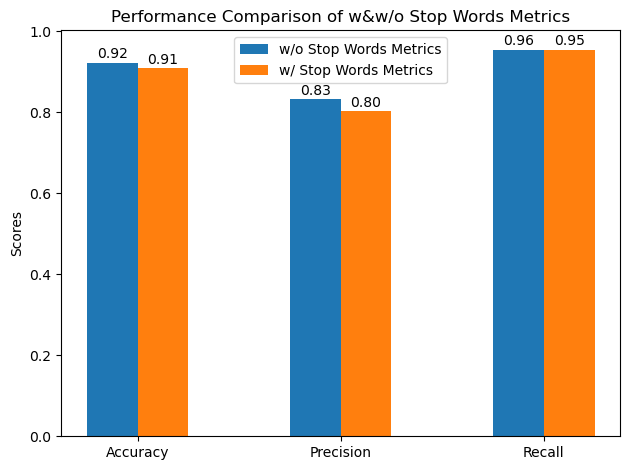

In [35]:
# Labels and Metric Values
apr_labels = ['Accuracy', 'Precision', 'Recall']
metrics = [accuracy, precision, recall]
ns_metrics = [ns_accuracy, ns_precision, ns_recall]

# Set the positions and width for the bars
x = np.arange(len(apr_labels))  # the label locations
width = 0.25  # the width of the bars

# Create a plot
fig, ax = plt.subplots()

# Plot the first set of bars (accuracy, precision, recall)
rects1 = ax.bar(x - width/2, metrics, width, label='w/o Stop Words Metrics')

# Plot the second set of bars (ns_accuracy, ns_precision, ns_recall)
rects2 = ax.bar(x + width/2, ns_metrics, width, label='w/ Stop Words Metrics')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of w&w/o Stop Words Metrics')
ax.set_xticks(x)
ax.set_xticklabels(apr_labels)
ax.legend()

# Function to add labels above the bars
def autolabel(rects):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply the autolabel function to both sets of bars
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()
plt.show()

The previous output of the dataframe cleaned with the stop words, it obtained the percentage values of **92% for Accuracy, 83% for Precision, and 96% for Recall**. To know the effect of removing the stop words, we proceed on not removing them when cleaning the email, hence I created a new function cleanEmail_NoStop. After all the computation, it obtained the percentage values of **91% for Accuracy, 80% for Precision, and 95% for Recall**. Hence we can conclude that removing the stop words increased the percentage values of accuracy, precision and recall.

**2. Experiment on the number of words used for training. Filter the dictionary to include only words occurring more than k times (1000 words, then k > 100, and k = 50 times). For example, the word “offer” appears 150 times, that means that it will be included in the dictionary.**

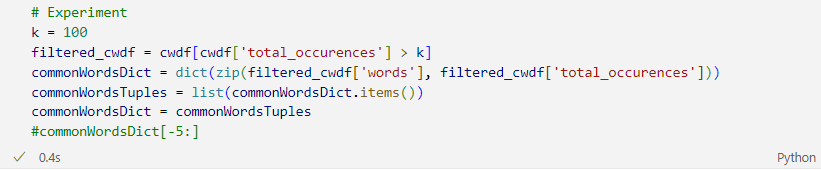

The filtered_cwdf was converted to a tuple then the value was given back to commonWordsDict to avoid possibly destroying or editing the next codes to be executed.

In the experiment the k value will be changed

In [36]:
k_1000 = {
    "Accuracy": 0.8900859460113788,
    "Precision": 0.8013502109704641,
    "Recall": 0.8813811026545387,
}

kg_100 = {
    "Accuracy": 0.9219828107977243,
    "Precision": 0.8355715689485752,
    "Recall": 0.9470948579914609,
}

ke_50 = {
    "Accuracy": 0.9227091151192349,
    "Precision": 0.8351272015655578,
    "Recall": 0.9506218674586968,
}

# Create a dictionary containing all the objects
k_all = {
    "k_1000": k_1000,
    "kg_100": kg_100,
    "ke_50": ke_50,
}

kdf = pd.DataFrame(k_all).T

kdf

,Accuracy,Precision,Recall
k_1000,0.890086,0.801350,0.881381
kg_100,0.921983,0.835572,0.947095
ke_50,0.922709,0.835127,0.950622


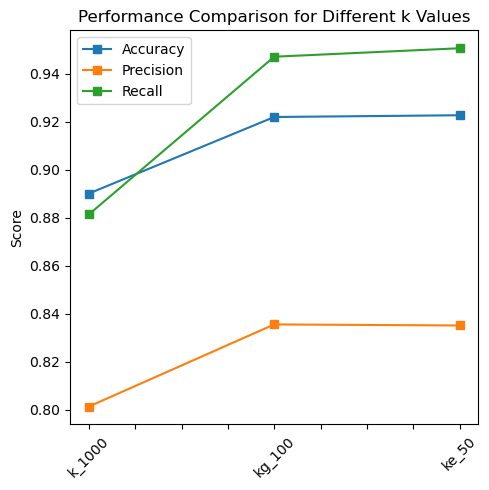

In [37]:
# Plot the k DataFrame
kdf.plot(kind='line', figsize=(5, 5), marker='s')

plt.ylabel('Score')
plt.title('Performance Comparison for Different k Values')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

When increasing the value of 𝑘 since the condition is that only occurrences greater than 𝑘 are included to be included in the dataset, a larger 𝑘 results in fewer data points remaining. As 𝑘 increases, data processing becomes faster, but the model's performance tends to decline.

**In short:**<br>
greater the k = lesser the performance, data, and time to process the data<br>
lesser the k = greater the performance, data, and time to process the data

**3. Discuss the results of the different parameters used for Lambda smoothing. Test it on 5 varying values of the λ (e.g. λ = 2.0, 1.0, 0.5, 0.1, 0.005), Evaluate performance metrics for each.**

Due to the heaviness of the code, experiments were done with the copy original code on a seperate file. Changing the value of lambda_value each experiment.

In [38]:
lambda2 = {
    "Accuracy": 0.9228906911996126,
    "Precision": 0.8334684611642614,
    "Recall": 0.9541488769259328,
}

lambda1 = {
    "Accuracy": 0.9231327926401162,
    "Precision": 0.8334683298234246,
    "Recall": 0.9550770373120475,
}

lambda0_5 = {
    "Accuracy": 0.9234354194407457,
    "Precision": 0.8339274141283215,
    "Recall": 0.9554483014664934,
}

lambda0_1 = {
    "Accuracy": 0.9236775208812492,
    "Precision": 0.8341431810819566,
    "Recall": 0.9560051976981623,
}

lambda0_005 = {
    "Accuracy": 0.9233143687204939,
    "Precision": 0.833117723156533,
    "Recall": 0.9563764618526082,
}

# Create a dictionary containing all the objects
lambda_data = {
    "lambda2": lambda2,
    "lambda1": lambda1,
    "lambda0_5": lambda0_5,
    "lambda0_1": lambda0_1,
    "lambda0_005": lambda0_005
}

lambda_df = pd.DataFrame(lambda_data).T

lambda_df


,Accuracy,Precision,Recall
lambda2,0.922891,0.833468,0.954149
lambda1,0.923133,0.833468,0.955077
lambda0_5,0.923435,0.833927,0.955448
lambda0_1,0.923678,0.834143,0.956005
lambda0_005,0.923314,0.833118,0.956376


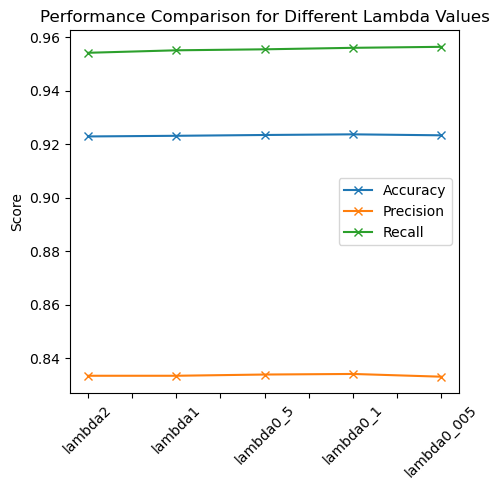

In [39]:

# Plot the Lambda DataFrame
lambda_df.plot(kind='line', figsize=(5, 5), marker='x')

plt.ylabel('Score')
plt.title('Performance Comparison for Different Lambda Values')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The resulting performance data from the different lambdas didn't change much. It remained on 92% for Accuracy, 83% for Precision, and 95% for Recall. The reason could be that the chosen method for cleaning data was good therefore lessening the impact of changing lambdas, or it could be that the training data was sufficient and dataset balanced enough.

**4. What are your recommendations to further improve the model?**

Picking/choosing of better REs and word choice to remove for cleaning the data to increase the the performance values. Also better implementation of the computations for faster processing of data.